# Derivadas

> $$\frac{dY}{dt} = V_Y$$
>
> $$\frac{d{V_Y}}{dt} = \frac{\frac{1}{2}\rho \ C_DAV_Y^2-mg}{m}$$

In [2]:
from scipy.integrate import odeint
from numpy import arange
import matplotlib.pyplot as plt
from math import pi
import pandas

In [3]:
rho = 1.19799  # densidade do ar(kg/m³)
cd = 1.5
A = pi * (45e-2/2)**2  # m³
m = .020  # kg
g = 9.8  # m/s²

y0 = 3.394
vy0 = 0
t0s = [y0, vy0]
dt = 1e-2
tf = 4
tempo = arange(0,tf,dt)

In [4]:
def modelo(dts,t):
    y = dts[0]
    vy = dts[1]

    peso = m * g
    drag = (1/2)* A * rho * vy**2 * cd

    dydt = vy
    dvydt = (drag/m) - (peso/m)
    if y <= 0:
        dydt = 0
        dvydt = 0
        
    return [dydt,dvydt]

93
93


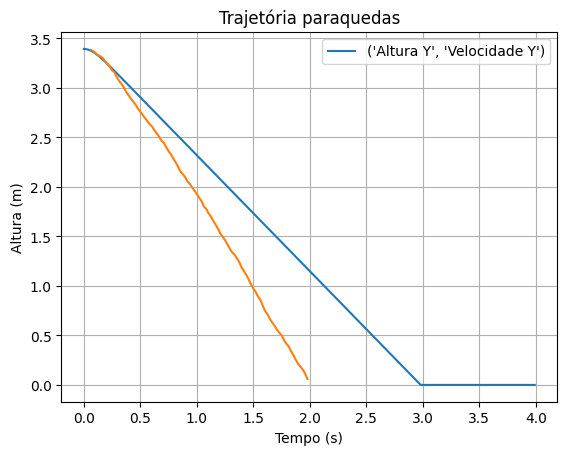

In [6]:
mod = odeint(modelo,t0s,tempo)
lista_y = mod[:,0]
listavy = mod[:,1]

fig, ax = plt.subplots()
plt.plot(tempo,lista_y,label=('Altura Y','Velocidade Y'))
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m)')
plt.legend()
fig.savefig('grafico.svg')


colunas = ['t', 'y', 'vy']
data = pandas.read_csv('paraslow2.csv',names =colunas)


data = data.dropna()
te = data.t.tolist() #transforma o data em uma lista
ye = data.y.tolist()
vye = data.vy.tolist()
print(len(te))
print(len(ye))
plt.title("Trajetória paraquedas")
plt.plot(te,ye)
plt.show()